# Parkinson's Disease Progression Prediction
### Project - SI 618: Data Manipulation and Analysis

### Peptide Data Analysis
Authors
1. Nowrin Mohamed - nowrin@umich.edu
2. Prithvijit Dasgupta - prithvid@umich.edu
3. Sachin Salim - sachinks@umich.edu

Kaggle link: https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction/overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
peptide_data = pd.read_csv('./data/train_peptides.csv')
peptide_data.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [5]:
display(peptide_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


None

In [9]:
print(f'records: {len(peptide_data)}')

unique_visits = len(peptide_data['visit_id'].unique())
print(f'Unique visits: {unique_visits}')

unique_peptides = len(peptide_data['Peptide'].unique())
print(f'Unique peptides: {unique_peptides}')

unique_patients = len(peptide_data['patient_id'].unique())
print(f'Unique patients: {unique_patients}')

visit_min = peptide_data['visit_month'].min()
visit_max = peptide_data['visit_month'].max()
print(f'Visit month range: ({visit_min}, {visit_max})')

records: 981834
Unique visits: 1113
Unique peptides: 968
Unique patients: 248
Visit month range: (0, 108)


In [17]:
peptide_data.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [16]:
peptide_data.max()

visit_id                    942_6
visit_month                   108
patient_id                  65043
UniProt                    Q9Y6R7
Peptide             YYWGGQYTWDMAK
PeptideAbundance      178752000.0
dtype: object

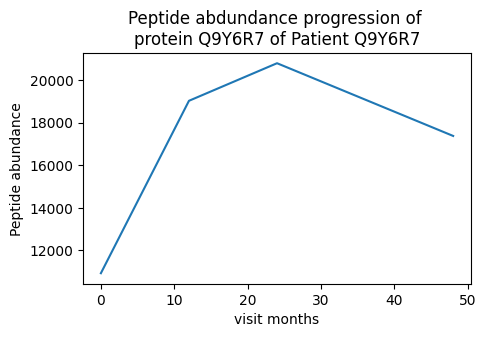

In [25]:
peptide_abundance_progression = peptide_data.query('patient_id == 65043 & Peptide == "YYWGGQYTWDMAK"')
plt.figure(figsize=(5,3))
plt.plot(peptide_abundance_progression['visit_month'], peptide_abundance_progression['PeptideAbundance'])
plt.xlabel("visit months")
plt.ylabel("Peptide abundance")
plt.title("Peptide abdundance progression of \nprotein Q9Y6R7 of Patient Q9Y6R7")
plt.show()

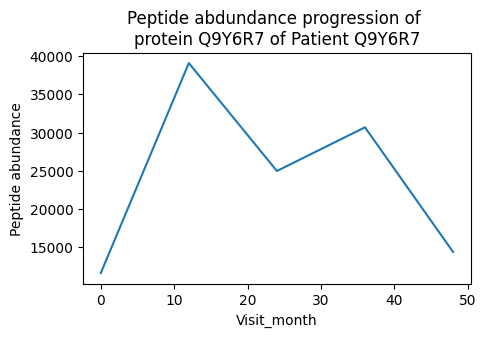

In [27]:
peptide_abundance_progression = peptide_data.query('patient_id == 16566.000000 & Peptide == "YYWGGQYTWDMAK"')
plt.figure(figsize=(5,3))
plt.plot(peptide_abundance_progression['visit_month'], peptide_abundance_progression['PeptideAbundance'])
plt.xlabel("Visit_month")
plt.ylabel("Peptide abundance")
plt.title("Peptide abdundance progression of \nprotein Q9Y6R7 of Patient Q9Y6R7")
plt.show()

In [28]:
peptide_data.groupby('visit_id')['Peptide'].count().value_counts().sort_index(ascending=False).head(10)

947    1
946    1
945    1
944    5
943    2
942    1
941    1
940    1
939    3
938    3
Name: Peptide, dtype: int64

This tells that, not all peptides are measured at any point of time.

In [32]:
peptide_data.groupby('visit_id')['Peptide'].count().describe()

count    1113.000000
mean      882.150943
std        69.156328
min        94.000000
25%       878.000000
50%       903.000000
75%       917.000000
max       947.000000
Name: Peptide, dtype: float64

In [39]:
peptide_features = peptide_data.pivot(index=['patient_id','visit_month'], columns='Peptide', values='PeptideAbundance')
peptide_features

Peptide                 AADDTWEPFASGK  \
patient_id visit_month                  
55         0                8984260.0   
           6                8279770.0   
           12               8382390.0   
           36              10671500.0   
942        6                6177730.0   
...                               ...   
64674      84               7083630.0   
65043      0                7818630.0   
           12               8070390.0   
           24               7608150.0   
           48               7187220.0   

Peptide                 AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
patient_id visit_month                                                     
55         0                                                     53855.6   
           6                                                     45251.9   
           12                                                    53000.9   
           36                                                    58108.4   
942        6                                                     42682.6   
...                                                                  ...   
64674      84                                                    35656.1   
65043      0                                                     95033.0   
           12                                                    76532.7   
           24                                                    75401.6   
           48                                                    72262.2   

Peptide                 AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
patient_id visit_month                                                  
55         0                                   8579740.0          NaN   
           6                                   8655890.0      49927.5   
           12                                  8995640.0      45519.2   
           36                                  9985420.0      52374.0   
942        6                                   3596660.0      25698.8   
...                                                  ...          ...   
64674      84                                  6273100.0          NaN   
65043      0                                   5119260.0      57483.7   
           12                                  8233520.0      54260.6   
           24                                  9168030.0          NaN   
           48                                  8551210.0          NaN   

Peptide                 AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  \
patient_id visit_month                                             
55         0                            19735.4         114400.0   
           6                            23820.4          90539.4   
           12                           17813.5         147312.0   
           36                           19373.3          64356.1   
942        6                            17130.6          86471.5   
...                                         ...              ...   
64674      84                               NaN          15479.2   
65043      0                            11610.0         270739.0   
           12                           11631.9         230169.0   
           24                           13313.9         220202.0   
           48                           12365.3         197981.0   

Peptide                 AAVYHHFISDGVR  ADDKETC(UniMod_4)FAEEGK  \
patient_id visit_month                                           
55         0                  46371.1                  70412.0   
           6                  38652.4                  63052.4   
           12                 45840.9                  72325.0   
           36                 49793.2                 537430.0   
942        6                  41007.9                  63761.4   
...                               ...                      ...   
64674      84                     NaN                  32935.4   
65043      0                  42527.3           

In [40]:
peptide_features.query('patient_id == 65043')

Peptide                 AADDTWEPFASGK  \
patient_id visit_month                  
65043      0                7818630.0   
           12               8070390.0   
           24               7608150.0   
           48               7187220.0   

Peptide                 AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
patient_id visit_month                                                     
65043      0                                                     95033.0   
           12                                                    76532.7   
           24                                                    75401.6   
           48                                                    72262.2   

Peptide                 AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
patient_id visit_month                                                  
65043      0                                   5119260.0      57483.7   
           12                                  8233520.0      54260.6   
           24                                  9168030.0          NaN   
           48                                  8551210.0          NaN   

Peptide                 AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  \
patient_id visit_month                                             
65043      0                            11610.0         270739.0   
           12                           11631.9         230169.0   
           24                           13313.9         220202.0   
           48                           12365.3         197981.0   

Peptide                 AAVYHHFISDGVR  ADDKETC(UniMod_4)FAEEGK  \
patient_id visit_month                                           
65043      0                  42527.3                 390412.0   
           12                 42255.5                 441297.0   
           24                 46914.1                 529563.0   
           48                 42311.3                 446770.0   

Peptide                 ADDKETC(UniMod_4)FAEEGKK  ADDLGKGGNEESTKTGNAGSR  ...  \
patient_id visit_month                                                   ...   
65043      0                           4209230.0                46225.1  ...   
           12                          4386040.0                43775.4  ...   
           24                          5542360.0                30188.3  ...   
           48                          5020860.0                36490.0  ...   

Peptide                 YSLTYIYTGLSK  YTTEIIK  YVGGQEHFAHLLILR  \
patient_id visit_month                                           
65043      0                257361.0  18316.6        2514660.0   
           12               230437.0  16703.2        2481560.0   
           24               251228.0  18326.2        2939460.0   
           48               233567.0  14478.3        3185530.0   

Peptide                 YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
patient_id visit_month                                        
65043      0                                        51444.6   
           12                                       44405.0   
           24                                       50588.2   
           48                                       48793.0   

Peptide                 YVMLPVADQDQC(UniMod_4)IR  YVNKEIQNAVNGVK  YWGVASFLQK  \
patient_id visit_month                                                         
65043      0                            530245.0        156148.0    157548.0   
           12                           543391.0        159828.0    161207.0   
           24                           597869.0        148032.0    192857.0   
           48                           501159.0        133992.0    170146.0   

Peptide                 YYC(UniMod_4)FQGNQFLR  YYTYLIMNK  YYWGGQYTWDMAK  
patient_id visit_month                                                   
65043      0                         336625.0    48423.2        10915.8  
           12                        330337.0    45368.1        19023.2  
           24    

In [41]:
patient_var = peptide_features.groupby('patient_id').std().mean()
month_var = peptide_features.groupby('visit_month').std().mean()
print((month_var/patient_var).mean())

1.6937201062185367


In [37]:
print("Total nan values: ", peptide_features.isna().sum().sum())
peptide_features.isna().sum().sort_values(ascending=False).to_frame().T

Total nan values:  95550


Peptide,QALPQVR,EPQVYTLPPSRDELTK,TPSGLYLGTC(UniMod_4)ER,SLEDQVEMLR,HYEGSTVPEK,VPEEDLKR,VAPDEHPILLTEAPLNPK,LTASAPGYLAITK,QQLVETHMAR,ALVQQMEQLR,...,VVEQMC(UniMod_4)ITQYER,KC(UniMod_4)STSSLLEAC(UniMod_4)TFR,IYLYTLNDNAR,ADQVC(UniMod_4)INLR,TATSEYQTFFNPR,TLLSNLEEAK,AIGYLNTGYQR,NILTSNNIDVK,KYLYEIAR,IPTTFENGR
0,624,550,523,514,508,507,497,494,492,482,...,1,1,1,1,1,0,0,0,0,0


8.86% of nan values are present which are easier to fill.